# Comprehensive pyhton data analysis of IPL data


- **https://datascienceplus.com/introduction-to-data-analysis-in-python-with-ipl-dataset?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com)**
- **https://www.kaggle.com/nulldata/begin-your-data-analysis-in-python-with-ipl-data/**
- **https://techtrunk.in/ipl-data-analysis/**
- https://www.kaggle.com/dude431/ipl-complete-analysis-part-1
- https://www.kaggle.com/adikeshri/ipl-a-complete-analysis
- https://www.kaggle.com/dude431/ipl-analysis-part-2-fantasy-league-edition

# Questions to solve_Part1

- **Link(https://datascienceplus.com/introduction-to-data-analysis-in-python-with-ipl-dataset?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com)**
- **Link (https://www.kaggle.com/nulldata/begin-your-data-analysis-in-python-with-ipl-data/)**
- **Link(https://techtrunk.in/ipl-data-analysis/)**

1.	How many matches we’ve got in the dataset?
2.	How many seasons we’ve got in the dataset?
3.	Which Team had won by maximum runs?
4.	Which Team had won by maximum wicket?
5.	Which Team had won by closest Margin (minimum runs)?
6.	Which Team had won by minimum wicket?
7.	Which Season had most number of matches?
8.	Which IPL Team is more successful?
9.	Has Toss-winning helped in winning matches?
10.	Best chasing venues?
11.	Best defending venue?
12.	Team won by max runs? And The best defending team?
13.	Team won by max wickets? And Best chasing team?
14.	In which city does Weather affected matches?
15.	Does choosing batting or bowling first helped in match winning?
16.	Top player of the match Winners
17.	Team Performance
18.	Match Winners based on Season Year?



In [1]:
# Packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (16, 6)

In [50]:
# Load dataset
ball= pd.read_csv("deliveries_2019.csv")
mat= pd.read_csv("matches_2019.csv")

# Data cleaning

In [5]:
ball.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [33]:
print(ball.batting_team.unique())
print(ball.bowling_team.unique())


['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals']
['Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Rising Pune Supergiant' 'Mumbai Indians' 'Kolkata Knight Riders'
 'Gujarat Lions' 'Kings XI Punjab' 'Delhi Daredevils'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


Delhi dare devils team name was changed to Delhi capitals but both teams are same. We can change the name

In [51]:
ball= ball.replace(to_replace= "Delhi Daredevils", value= "Delhi Capitals")

In [52]:
print(ball.batting_team.nunique())
print(ball.bowling_team.nunique())

14
14


In [39]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [40]:
mat.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [58]:
mat= mat.replace(to_replace= "Delhi Daredevils", value= "Delhi Capitals")

In [59]:
mat.team1.nunique()

14

In [53]:
mat.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Umpire3 column has many null vlues and we cna drop the column

In [55]:
mat=mat.drop(["umpire3"], axis=1)

In [73]:
mat.shape

(756, 17)

In [60]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


# Questions@part1

#### 1.1. How many seasons we’ve got in the dataset

In [234]:
print(mat["season"].nunique())
print(mat["season"].unique())

12
[2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]


#### 1.2. How many matches we’ve got in the dataset?

Text(0, 0.5, 'No. of matches')

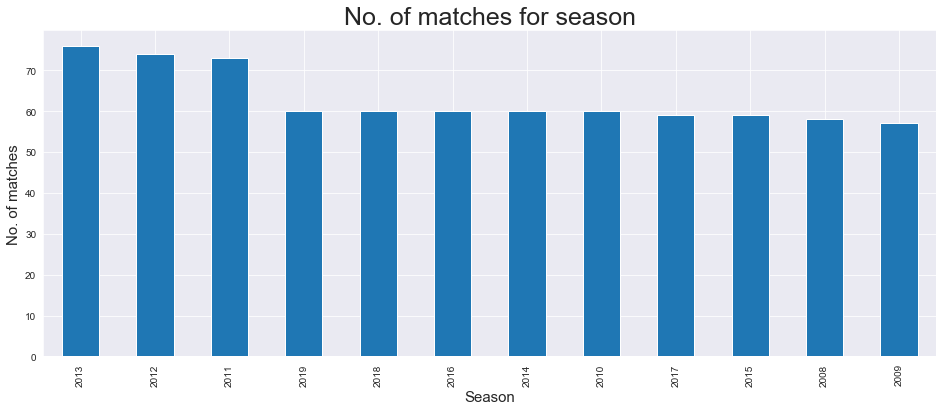

In [68]:
mat.season.value_counts().plot.bar()
plt.title("No. of matches for season", size=25)
plt.xlabel("Season", size=15)
plt.ylabel("No. of matches", size=15)

In [235]:
print(mat["id"].count())
print(mat["season"].count())

# another method
# mat["id"].max()


756
756


#### 1.3. Which Team had won by maximum runs?

In [237]:
# Maximum run win was with 146 runs
mat["win_by_runs"].max()

146

In [81]:
mat.iloc[mat["win_by_runs"].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2                Delhi Capitals
toss_winner          Delhi Capitals
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

#### 1.4. Which Team had won by maximum wicket?

In [238]:
mat["win_by_wickets"].max()

10

In [83]:
mat.iloc[mat["win_by_wickets"].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

#### 1.5. Which Team had won by closest Margin (minimum runs)?

In [93]:
# Closet margin means, match won by one run(1)
mat[mat["win_by_runs"]==1]
# More than one match won with minimum score

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi
105,106,2008,Mumbai,2008-05-21,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,1,0,SE Marsh,Wankhede Stadium,BF Bowden,GA Pratapkumar
163,164,2009,Johannesburg,2009-05-17,Kings XI Punjab,Deccan Chargers,Deccan Chargers,field,normal,0,Kings XI Punjab,1,0,Yuvraj Singh,New Wanderers Stadium,S Ravi,RB Tiffin
344,345,2012,Delhi,2012-04-29,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,normal,0,Delhi Capitals,1,0,V Sehwag,Feroz Shah Kotla,S Ravi,RJ Tucker
350,351,2012,Pune,2012-05-03,Mumbai Indians,Pune Warriors,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,SL Malinga,Subrata Roy Sahara Stadium,Asad Rauf,S Asnani
518,519,2015,Chennai,2015-04-09,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,1,0,A Nehra,"MA Chidambaram Stadium, Chepauk",RK Illingworth,VA Kulkarni
598,599,2016,Delhi,2016-04-27,Gujarat Lions,Delhi Capitals,Delhi Capitals,field,normal,0,Gujarat Lions,1,0,CH Morris,Feroz Shah Kotla,M Erasmus,S Ravi
614,615,2016,Chandigarh,2016-05-09,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,1,0,SR Watson,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,HDPK Dharmasena
734,11330,2019,Bengaluru,21/04/19,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Royal Challengers Bangalore,1,0,PA Patel,M. Chinnaswamy Stadium,Vineet Kulkarni,Rod Tucker
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould


In [91]:
mat.iloc[mat[mat["win_by_runs"].ge(1)].win_by_runs.idxmin()]
# this code will show only the first match with minimum score winning

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

In [106]:
# To pullout all other matches won by minimum runs
mat[mat[mat["win_by_runs"].ge(1)].win_by_runs.min()== mat["win_by_runs"]]["winner"]


58                  Mumbai Indians
105                Kings XI Punjab
163                Kings XI Punjab
344                 Delhi Capitals
350                 Mumbai Indians
518            Chennai Super Kings
598                  Gujarat Lions
614    Royal Challengers Bangalore
734    Royal Challengers Bangalore
755                 Mumbai Indians
Name: winner, dtype: object

#### 1.6. Which Team had won by minimum wicket?

In [98]:
mat[mat["win_by_wickets"]==0]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,11339,2019,Hyderabad,29/04/19,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe
745,11341,2019,Chennai,01/05/19,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon
746,11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan


In [99]:
mat.iloc[mat[mat["win_by_wickets"].ge(0)].win_by_wickets.idxmin()]

id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              2017-04-05
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

In [109]:
mat[mat[mat["win_by_wickets"].ge(0)].win_by_wickets.min()==mat["win_by_wickets"]]["winner"]

# This code will display all the matches with minimum wicket win

0              Sunrisers Hyderabad
4      Royal Challengers Bangalore
8                   Delhi Capitals
13           Kolkata Knight Riders
14                  Delhi Capitals
                  ...             
743            Sunrisers Hyderabad
744                            NaN
745            Chennai Super Kings
746                 Mumbai Indians
755                 Mumbai Indians
Name: winner, Length: 350, dtype: object

#### 1.7. Which Season had most number of matches?

Text(0, 0.5, 'No. of matches')

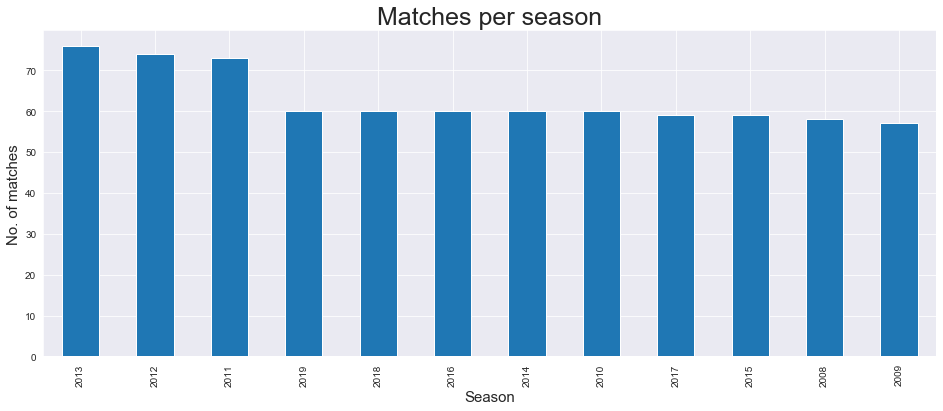

In [242]:
mat["season"].value_counts().plot.bar()
plt.title("Matches per season", size=25)
plt.xlabel("Season", size=15)
plt.ylabel("No. of matches", size=15)

Text(0, 0.5, 'No. of matches')

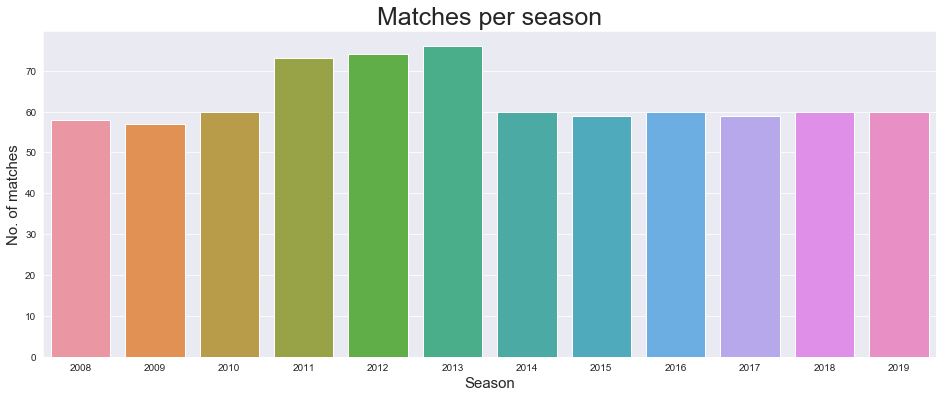

In [241]:
sns.countplot(x="season", data=mat)
plt.title("Matches per season", size=25)
plt.xlabel("Season", size=15)
plt.ylabel("No. of matches", size=15)

**2013 season has highest number of matches becasue more than 8 IPL teams partcipated**

#### 1.8. Which IPL Team is more successful?

Text(0, 0.5, 'No. of matches won')

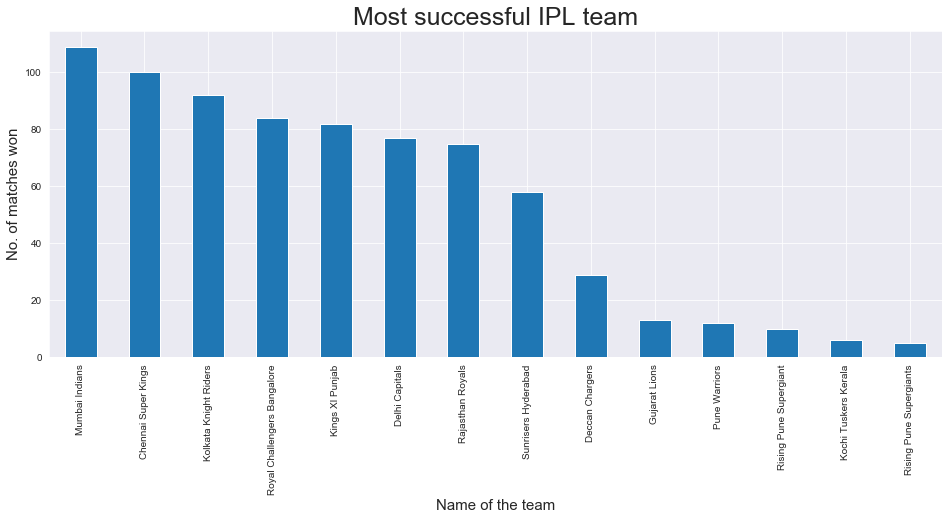

In [117]:
mat["winner"].value_counts().plot.bar()
plt.title("Most successful IPL team", size=25)
plt.xlabel("Name of the team", size=15)
plt.ylabel("No. of matches won", size=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

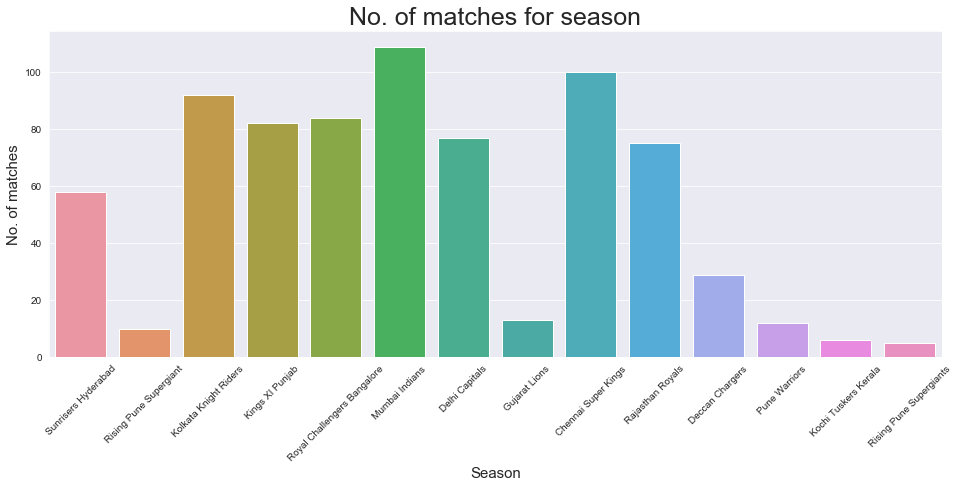

In [124]:
sns.countplot(x= "winner", data=mat)
plt.title("No. of matches for season", size=25)
plt.xlabel("Season", size=15)
plt.ylabel("No. of matches", size=15)
plt.xticks(rotation=45)

# Another way
#data= mat["winner"].value_counts()
#sns.barplot(y= data.index, x= data, orient="h")

**Mumbai indinas has maximum number of wins**

#### 1.9. Has Toss-winning helped in winning matches?

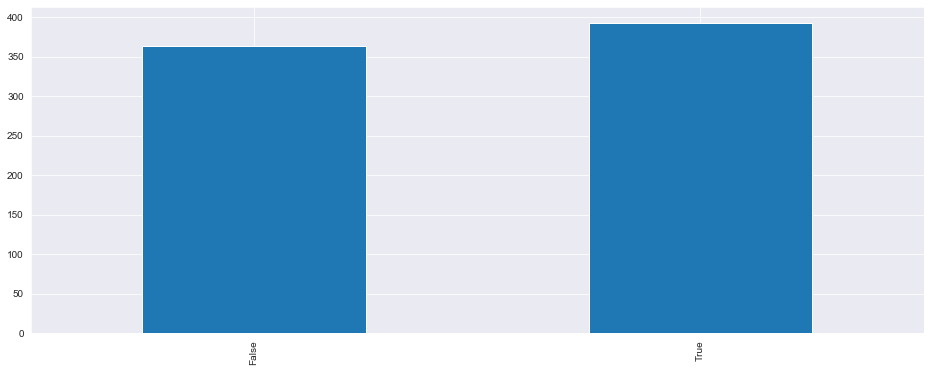

In [126]:
a= mat["toss_winner"]== mat["winner"]
a.groupby(a).size().plot.bar()

In [130]:
# percentage of winning
round(a.groupby(a).size()/a.count()*100,2)

False    48.02
True     51.98
dtype: float64

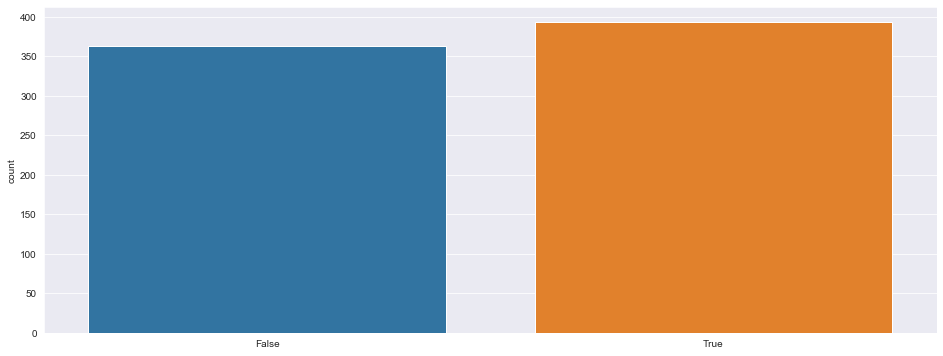

In [131]:
sns.countplot(a)

**52% times team won afetr toos won**

#### 1.10. Best chasing venues?

In [243]:
mat.venue[mat["win_by_wickets"]!=0].mode()

0    Eden Gardens
dtype: object

In [245]:
mat.venue[mat["win_by_wickets"]!=0].value_counts()

Eden Gardens                                            45
M Chinnaswamy Stadium                                   40
Wankhede Stadium                                        37
Feroz Shah Kotla                                        33
Sawai Mansingh Stadium                                  32
Rajiv Gandhi International Stadium, Uppal               32
Punjab Cricket Association Stadium, Mohali              20
MA Chidambaram Stadium, Chepauk                         18
Maharashtra Cricket Association Stadium                 14
Dr DY Patil Sports Academy                              10
SuperSport Park                                          8
Holkar Cricket Stadium                                   8
Punjab Cricket Association IS Bindra Stadium, Mohali     7
Saurashtra Cricket Association Stadium                   6
Subrata Roy Sahara Stadium                               6
Kingsmead                                                6
JSCA International Stadium Complex                      

Text(0, 0.5, 'No. of matches')

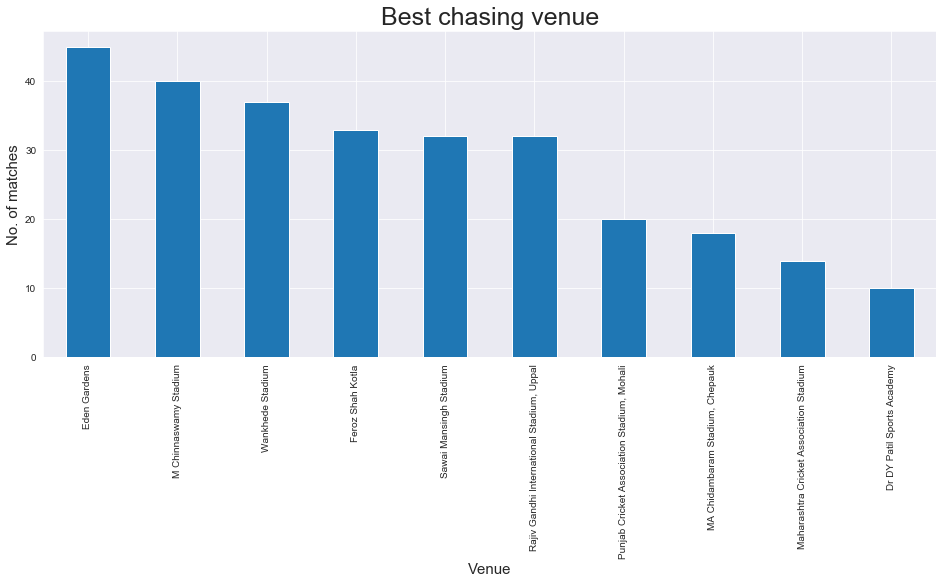

In [246]:
mat.venue[mat["win_by_wickets"]!=0].value_counts().nlargest(10).plot.bar()
plt.title("Best chasing venue", size=25)
plt.xlabel("Venue", size=15)
plt.ylabel("No. of matches", size=15)

#### 1.11. Best defending venue?

In [147]:
mat.venue[mat["win_by_runs"]!=0].mode()

0    Wankhede Stadium
dtype: object

In [248]:
mat.venue[mat["win_by_runs"]!=0].value_counts()

Wankhede Stadium                                        35
Feroz Shah Kotla                                        33
Eden Gardens                                            32
MA Chidambaram Stadium, Chepauk                         30
M Chinnaswamy Stadium                                   30
Rajiv Gandhi International Stadium, Uppal               23
Punjab Cricket Association Stadium, Mohali              15
Sawai Mansingh Stadium                                  15
Subrata Roy Sahara Stadium                              11
Kingsmead                                                9
Maharashtra Cricket Association Stadium                  7
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      7
Punjab Cricket Association IS Bindra Stadium, Mohali     7
Dr DY Patil Sports Academy                               7
Brabourne Stadium                                        6
Sardar Patel Stadium, Motera                             6
Himachal Pradesh Cricket Association Stadium            

Text(0, 0.5, 'No. of matches')

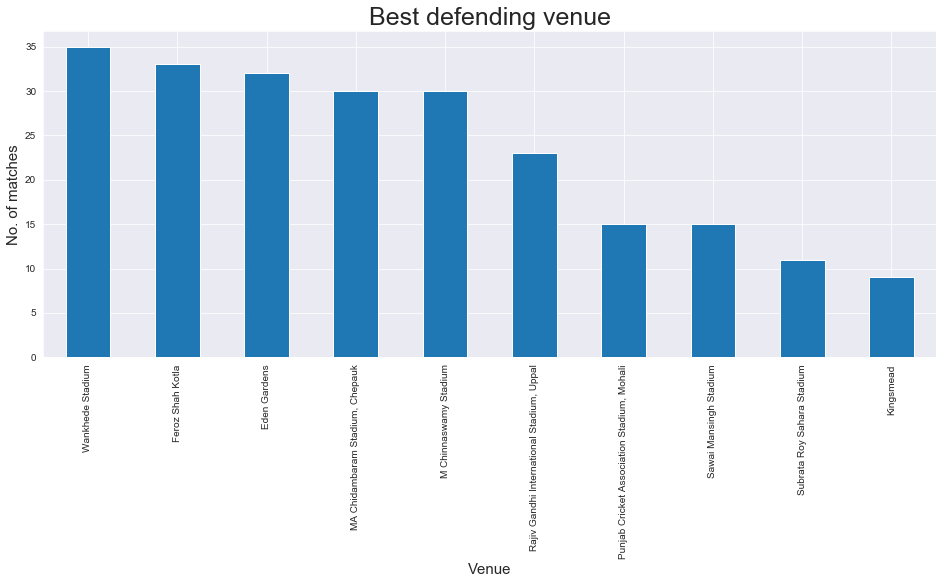

In [249]:
mat.venue[mat["win_by_runs"]!=0].value_counts().nlargest(10).plot.bar()
plt.title("Best defending venue", size=25)
plt.xlabel("Venue", size=15)
plt.ylabel("No. of matches", size=15)

#### 1.12. Team won by max runs? And The best defending team?

In [156]:
mat.winner[mat["win_by_runs"]!=0].mode()

0    Mumbai Indians
dtype: object

In [251]:
mat.winner[mat["win_by_runs"]!=0].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Delhi Capitals                 28
Rajasthan Royals               27
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

Text(0, 0.5, 'No. of matches')

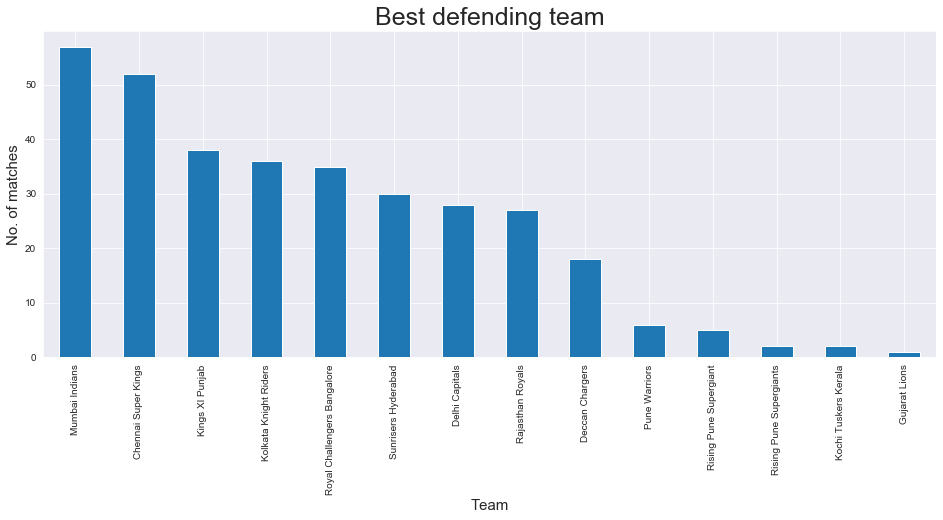

In [256]:
mat.winner[mat["win_by_runs"]!=0].value_counts().plot.bar()
plt.title("Best defending team", size=25)
plt.xlabel("Team", size=15)
plt.ylabel("No. of matches", size=15)

#### 1. 13. Team won by max wickets? And Best chasing team?

In [157]:
mat.winner[mat["win_by_wickets"]!=0].mode()

0    Kolkata Knight Riders
dtype: object

In [253]:
mat.winner[mat["win_by_wickets"]!=0].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Delhi Capitals                 48
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

Text(0, 0.5, 'No. of matches')

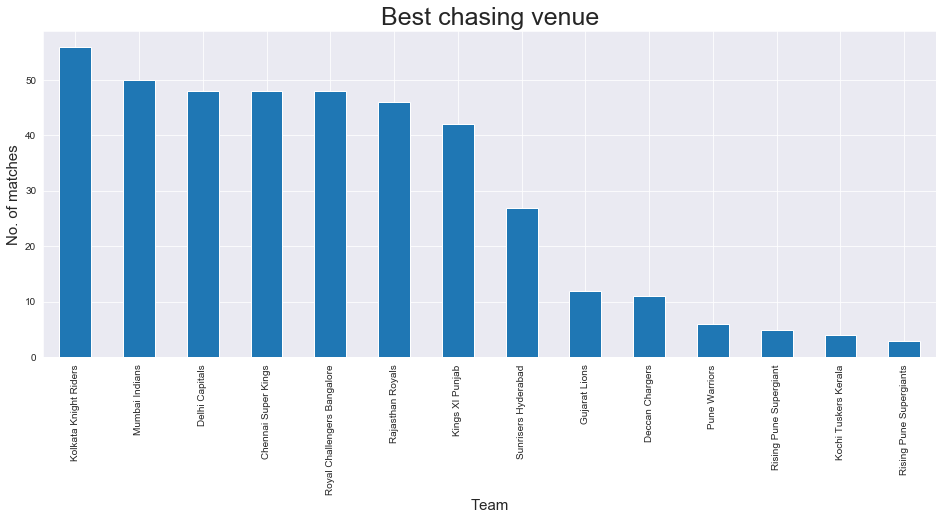

In [255]:
mat.winner[mat["win_by_wickets"]!=0].value_counts().plot.bar()
plt.title("Best chasing venue", size=25)
plt.xlabel("Team", size=15)
plt.ylabel("No. of matches", size=15)

#### 14.In which city does Weather affected matches?

In [164]:
mat.city[mat["dl_applied"]==1].mode()

0    Kolkata
dtype: object

Text(0, 0.5, 'No. of matches')

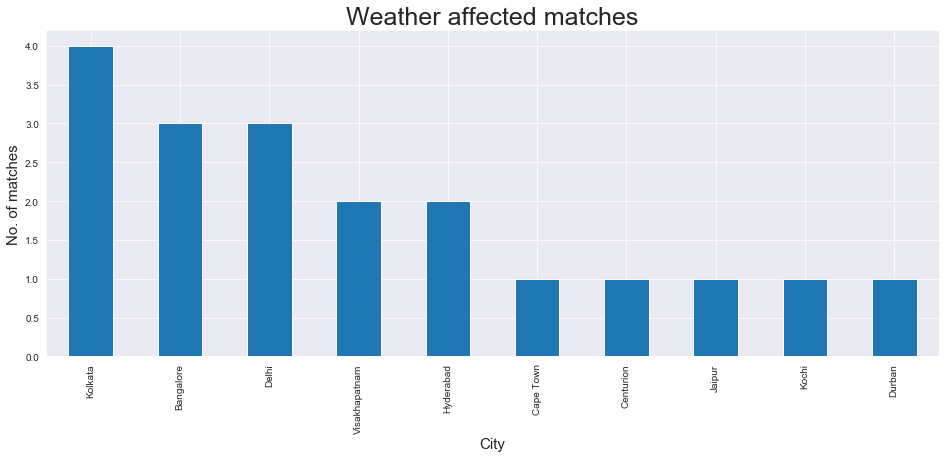

In [257]:
mat.city[mat["dl_applied"]==1].value_counts().plot.bar()
plt.title("Weather affected matches", size=25)
plt.xlabel("City", size=15)
plt.ylabel("No. of matches", size=15)

Text(0, 0.5, 'No. of matches')

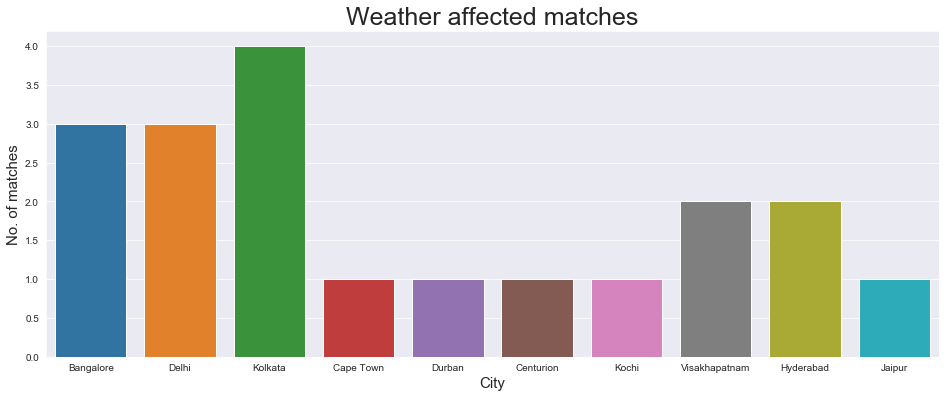

In [258]:
# Second method
sns.countplot(mat.city[mat["dl_applied"]==1])
plt.title("Weather affected matches", size=25)
plt.xlabel("City", size=15)
plt.ylabel("No. of matches", size=15)

#### 1.15. Does choosing batting or bowling first helped in match winning?

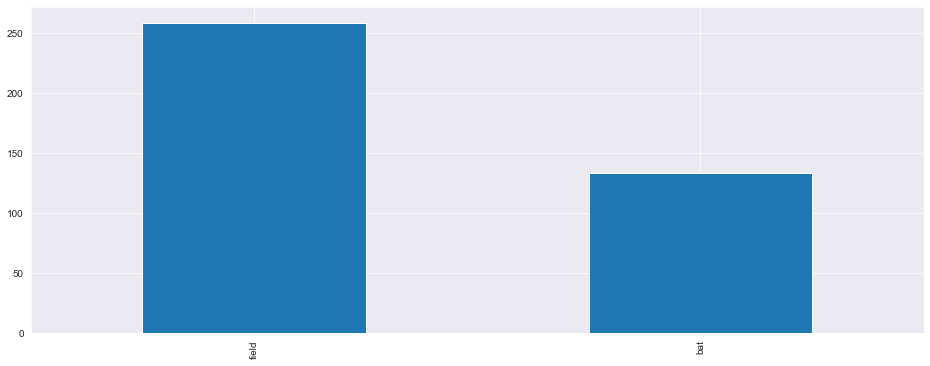

In [171]:
mat.toss_decision[mat["toss_winner"]==mat["winner"]].value_counts().plot.bar()

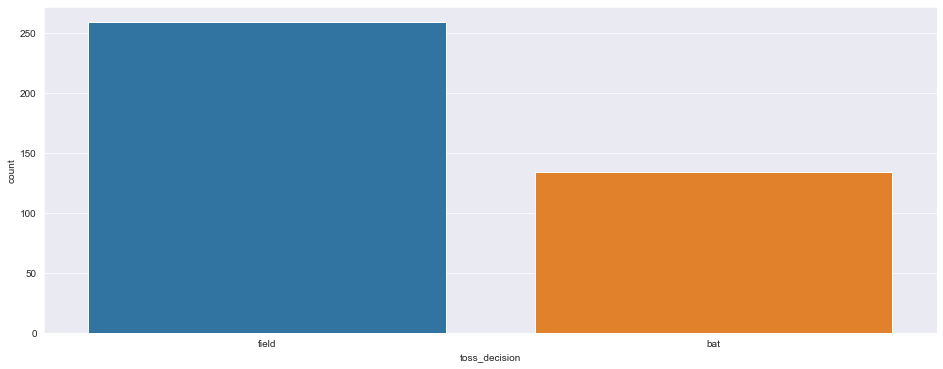

In [172]:
sns.countplot(mat.toss_decision[mat["toss_winner"]==mat["winner"]])

**From the above visualization, we can say that choosing to field first for the toss winner helped in winning the match than batting first in IPL from 2007 to 2019**

#### 1.16. 16.	Top player of the match Winners

In [187]:
mat["player_of_match"].value_counts()

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
                  ..
GJ Bailey          1
AC Voges           1
S Sohal            1
AD Mathews         1
M Ur Rahman        1
Name: player_of_match, Length: 226, dtype: int64

Text(0, 0.5, 'No. of Man of the matches')

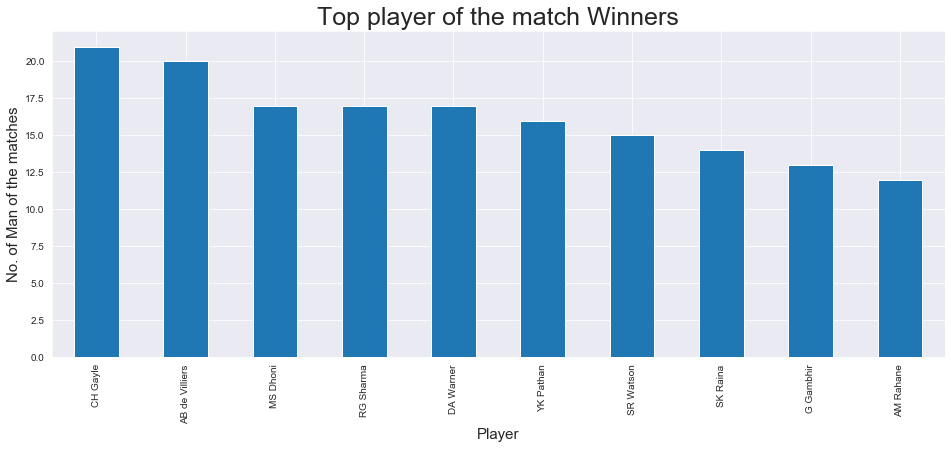

In [259]:
mat["player_of_match"].value_counts().nlargest(10).plot.bar()
plt.title("Top player of the match Winners", size=25)
plt.xlabel("Player", size=15)
plt.ylabel("No. of Man of the matches", size=15)

**Chris Gayle Tops the List with 21 MOMs amongst all the players from the above data. No better Example to show that how Destructive Batsman “Christopher Henry Gayle” is.**

#### 1.17. Team Performance

In [214]:
mat[mat["win_by_runs"]>0].groupby("winner")["win_by_runs"].apply(np.median).sort_values(ascending=False)


winner
Rising Pune Supergiants        26.5
Rajasthan Royals               26.0
Mumbai Indians                 25.0
Kolkata Knight Riders          24.5
Chennai Super Kings            24.0
Pune Warriors                  23.0
Delhi Capitals                 22.0
Royal Challengers Bangalore    20.0
Rising Pune Supergiant         20.0
Kings XI Punjab                17.0
Sunrisers Hyderabad            15.5
Deccan Chargers                14.5
Kochi Tuskers Kerala           11.5
Gujarat Lions                   1.0
Name: win_by_runs, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

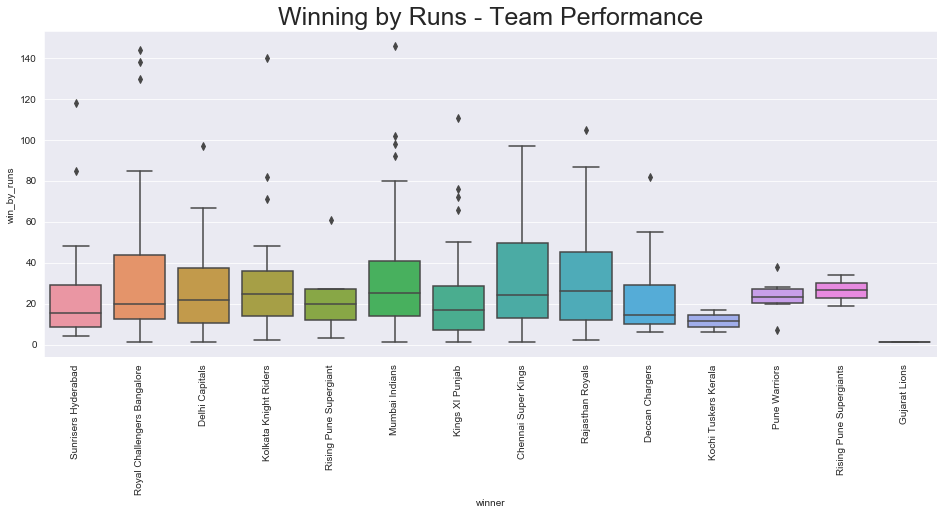

In [218]:
sns.boxplot(y= "win_by_runs", x="winner", data=mat[mat["win_by_runs"]>0])
plt.title("Winning by Runs - Team Performance", size=25)
plt.xticks(rotation=90)

In [219]:
# Based on win_by_wickets
mat[mat["win_by_wickets"]>0].groupby("winner")["win_by_wickets"].apply(np.median).sort_values(ascending=False)


winner
Kochi Tuskers Kerala           7.5
Sunrisers Hyderabad            7.0
Rising Pune Supergiants        7.0
Royal Challengers Bangalore    6.5
Pune Warriors                  6.5
Rising Pune Supergiant         6.0
Rajasthan Royals               6.0
Mumbai Indians                 6.0
Kolkata Knight Riders          6.0
Kings XI Punjab                6.0
Gujarat Lions                  6.0
Delhi Capitals                 6.0
Deccan Chargers                6.0
Chennai Super Kings            6.0
Name: win_by_wickets, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

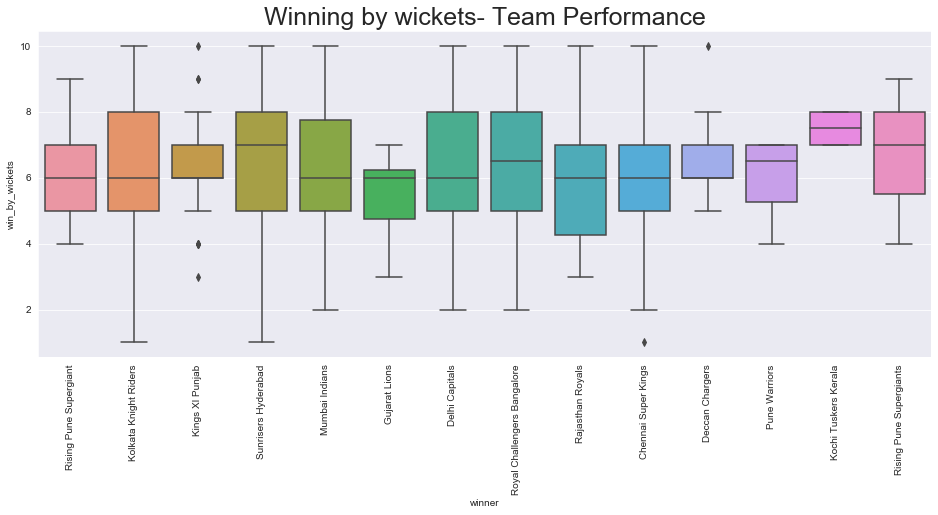

In [221]:
sns.boxplot(y="win_by_wickets", x="winner", data= mat[mat["win_by_wickets"]>0])
plt.title("Winning by wickets- Team Performance", size=25)
plt.xticks(rotation=90)

#### 1.18. Match Winners based on Season Year?

In [226]:
pd.DataFrame(mat.groupby("season")["winner"].value_counts())

winner
season winner                             
2008   Rajasthan Royals                 13
       Kings XI Punjab                  10
       Chennai Super Kings               9
       Delhi Capitals                    7
       Mumbai Indians                    7
...                                    ...
2019   Kings XI Punjab                   6
       Kolkata Knight Riders             6
       Sunrisers Hyderabad               6
       Rajasthan Royals                  5
       Royal Challengers Bangalore       5

[100 rows x 1 columns]